# Read the inversion output .emo file

In [1]:
import pprint

import aarhusinvwrapper

In [2]:
emo = aarhusinvwrapper.read_emo('example.emo')

The object that is returned is basically a dictionary, but with attribute access (see [attrdict](https://pypi.python.org/pypi/attrdict)).

In [3]:
emo

{'SharpHorizontal': -1.0,
 'SharpPrior': 0.0,
 'SharpVertical': -1.0,
 'aniso_max': 0.0,
 'aniso_min': 0.0,
 'chrg_max': 0.0,
 'chrg_min': 0.0,
 'compile_datetime': None,
 'compile_time': datetime.time(0, 0),
 'data_fns': ['reedyck_7l_1000.tem'],
 'dds': [29],
 'doi': True,
 'dset_src_types': [7],
 'dset_types': [1],
 'final_rhos': array([ 0.1  ,  1.3  ,  3.136,  4.717,  3.143,  1.569,  6.148]),
 'final_thks': array([ 0.219,  0.832,  1.594,  3.307,  4.476,  8.445]),
 'final_tops': array([  0.   ,   0.219,   1.051,   2.645,   5.952,  10.428]),
 'fn': 'example.emo',
 'min_apriori_std': 1e+60,
 'model_fn': 'REEDYCK_7l_1000.mod',
 'model_params': array([[ 0.   ,  4.43 ,  4.43 ,  4.43 ,  4.43 ,  4.43 ,  4.43 ,  4.43 ,
          1.79 ,  0.79 ,  1.4  ,  2.51 ,  4.48 ,  8.   ],
        [ 1.   ,  3.048,  3.793,  3.459,  3.167,  3.272,  3.724,  3.94 ,
          1.79 ,  0.79 ,  1.4  ,  2.51 ,  4.48 ,  8.   ],
        [ 2.   ,  2.297,  3.463,  2.973,  2.585,  2.812,  3.44 ,  3.754,
          1.838

Not everything in the emo file is read into this object yet, but most of the important stuff is.

The ``niterations`` and ``nlayers_model`` attributes are useful, along with the ``models`` list, which shows the progression of the inversion. The ``final_rhos``, ``final_tops``, and ``final_thks`` are from the last model in the inversion.

For example, below I've plotted the progress of the inversion in this example .emo file:

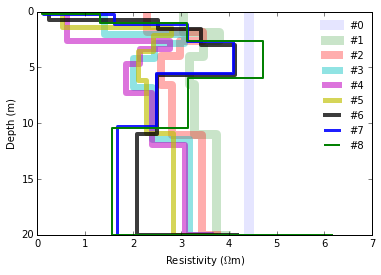

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

n = float(len(emo.models))
for i, model in enumerate(emo.models):
    plt.step(model.rhos, list(model.tops)+[20], lw=(n-i)+1, alpha=(i/n)+0.1, label="#%d" % i)
plt.gca().invert_yaxis()
plt.legend(loc='best', frameon=False, fontsize='medium')
plt.xlabel(r'Resistivity ($\Omega$m)')
plt.ylabel('Depth (m)')